In [19]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [20]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,23572,None,None,88585.323427
2020-06-13,23573,None,None,81834.954443
2020-06-14,23574,None,None,75616.955251
2020-06-15,23575,None,None,69930.533084
2020-06-16,23576,None,None,64950.199662
...,...,...,...,...
2021-01-09,23783,None,None,820279.663816
2021-01-10,23784,None,None,828305.190986
2021-01-11,23785,None,None,832232.557576


In [21]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-13_2021-01-13-16-12.pickle


In [22]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-12_2021-01-12-19-35.pickle


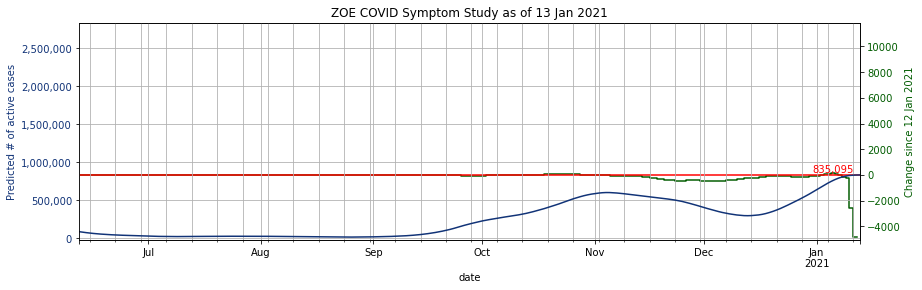

In [23]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

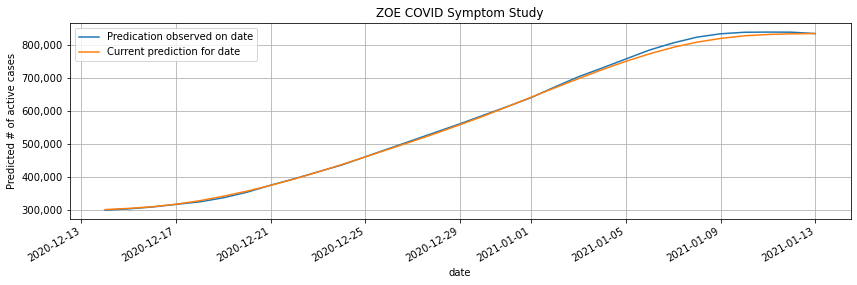

In [24]:
plot_study_evolution(curr_date, days=30)

In [25]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [26]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-01-13_2021-01-13-16-14.pickle


In [27]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
329,Denbighshire,W06000004,10.556423
342,Bridgend,W06000013,3.645645
379,Tower Hamlets,E09000030,3.224930
345,Enfield,E09000010,3.089205
352,Hounslow,E09000018,2.976070
108,Christchurch,E07000048,2.845348
175,Rossendale,E07000125,2.814652
370,Redbridge,E09000026,2.814615
338,Croydon,E09000008,2.804158
369,Newham,E09000025,2.801496
